# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [37]:
# Import your libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [3]:
# Your code here
mu, sigma = 50, 5 # mean and standard deviation
s_10 = np.random.normal(mu, sigma, 10)
s_50 = np.random.normal(mu, sigma, 50)
s_500 = np.random.normal(mu, sigma, 500)
s_5000 = np.random.normal(mu, sigma, 5000)

In [8]:
from scipy.stats import normaltest
print(scipy.stats.normaltest(s_10))
print(scipy.stats.normaltest(s_50))
print(scipy.stats.normaltest(s_500))
print(scipy.stats.normaltest(s_5000))


NormaltestResult(statistic=0.6695413993393939, pvalue=0.7155021324192288)
NormaltestResult(statistic=9.514074768454513, pvalue=0.008591023634723683)
NormaltestResult(statistic=5.316124562181471, pvalue=0.07008389314066309)
NormaltestResult(statistic=9.445493125375746, pvalue=0.00889072604721809)


#### Interpret the normaltest results and make your observations.

Hipótesis nula -> la distribución es normal
Para un nivel de confianza del 1% no podemos reachazar la hipótesis 0 en las muestras s_10 y s_500, ser el p-value > 0.01.
En el resto, si se rechazan.


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

Text(0.5, 1.0, 'n = 5000')

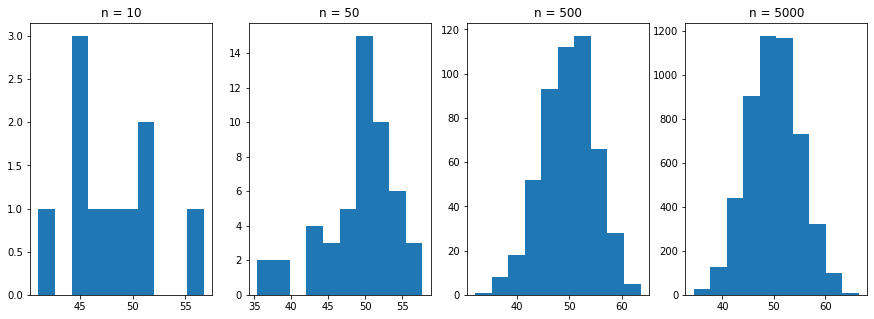

In [25]:

fig, axes = plt.subplots(1,4, figsize= (15,5))
plt.sca(axes[0])
plt.hist(s_10)
plt.title("n = 10")
plt.sca(axes[1])
plt.hist(s_50)
plt.title("n = 50")
plt.sca(axes[2])
plt.hist(s_500)
plt.title("n = 500")
plt.sca(axes[3])
plt.hist(s_5000)
plt.title("n = 5000")



#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

*A medida que aumenta n, la distribución de los datos se aproxima a una distribución normal.*


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

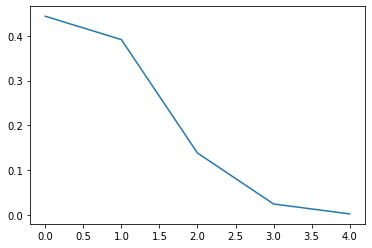

In [72]:
n = 5
p = 0.15
fig, ax = plt.subplots(1, 1)
x = range(5)
ax.plot(x, binom.pmf(x, n, p), '-', ms=8, label='binom pmf')
#ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### Explain what you observe from the plot above

*A medida que aumenta el número de personas, la probabilidad de que todas ellas hagan click en el anuncio disminuye.*

#### Now plot PMP with 50, 500, and 5000 visitors.

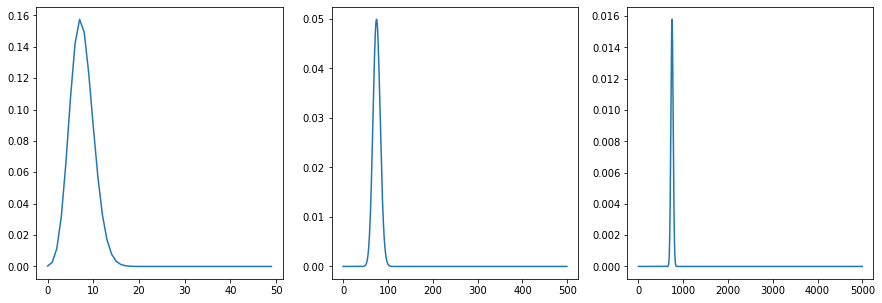

In [73]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.sca(axes[0])
plt.plot(range(50), binom.pmf(range(50), 50, .15), '-', ms=8, label='binom pmf')
plt.sca(axes[1])
plt.plot(range(500), binom.pmf(range(500), 500, .15), '-', ms=8, label='binom pmf')
plt.sca(axes[2])
plt.plot(range(5000), binom.pmf(range(5000), 5000, .15), '-', ms=8, label='binom pmf')

#### What did you notice from the distribution plots? Comment your findings.

*La distribución alcanza un máximo a partir del cual, la probabilidad de que el visitante  haga click en el anuncio no aumenta a pesar de que se incremente el número de visitantes.*

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

Es una distribución que se se utliza, por lo general, para modelizar el número de veces que ocurren sucesos poco frecuentes.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [76]:
from scipy.stats import poisson
mu = 300
poisson.pmf(320, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [77]:
poisson.pmf(60, mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

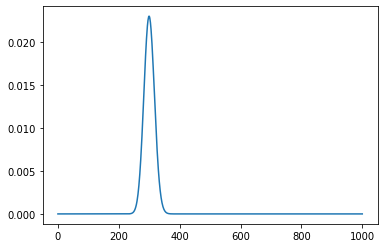

In [82]:
plt.plot((range(1001)), poisson.pmf(range(1001), mu), '-', label='Poisson pmf')